In [1]:
from backend.data_model.time_series import DataMultibandTimeSeries
from backend.data_model.data_model_interface import DataModelInterface, load_config
from backend.online.online_algorithms import OurMethod
from backend.online.online_interface import OnlineInterface
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_time_series(time_series, color='blue'):
    time_series.fold()
    if time_series:
        plt.plot(time_series['B'].phase, time_series['B'].values, '*', color='blue')
    if 'R' in time_series:
        plt.plot(time_series['R'].phase, time_series['R'].values, '*', color='red')
    plt.show()

[ -6.80483429  20.85405352 -11.37758281  -3.71333078   1.60644082]


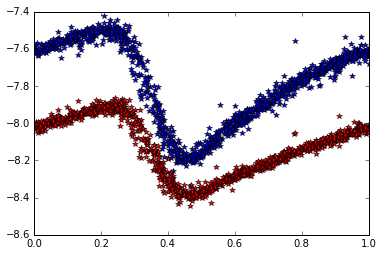

In [3]:
config = load_config('/home/lucas/PycharmProjects/lightcurves-backend/backend/config.json')
data_model_interface = DataModelInterface(config)
online_interface = OnlineInterface(data_model_interface)
ts_target = data_model_interface.get_time_series_database().get_one('macho', '1.3447.36')
print ts_target.reduced_vector
feature_dict = ts_target.feature_dict
plot_time_series(ts_target, 'red')

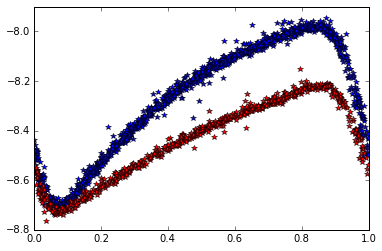

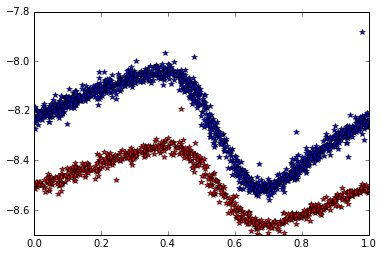

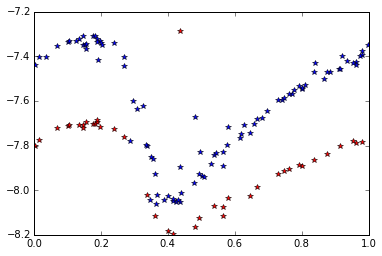

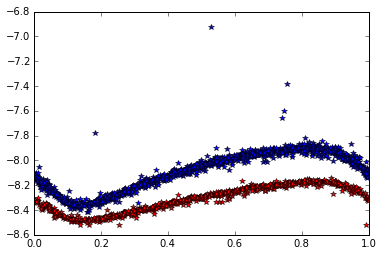

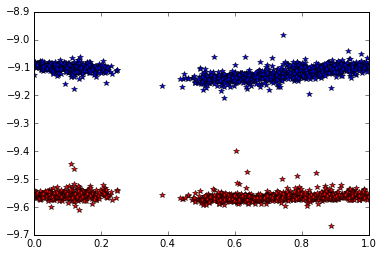

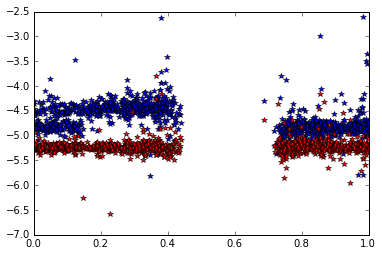

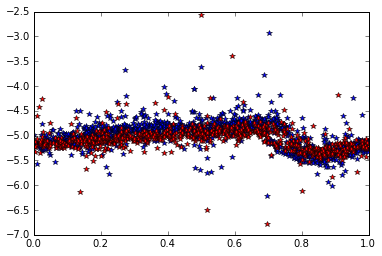

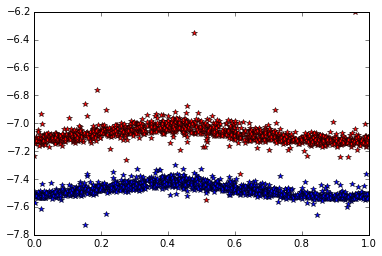

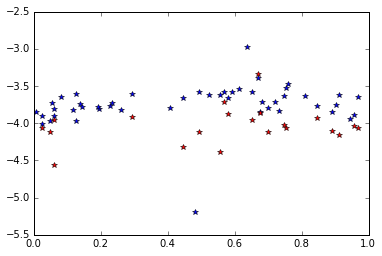

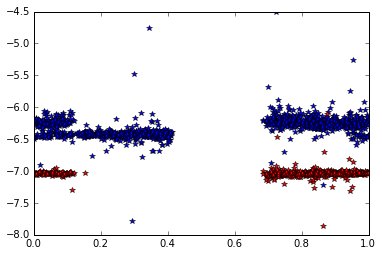

In [4]:
time_series_ranking, distances = online_interface.feature_space_query(feature_dict, 10)
for ts, distance in zip(time_series_ranking, distances):
    plot_time_series(ts)